# Exploring Dataset

In [1]:
#import relevant packages
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
from matplotlib.pyplot import subplots, show
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
import numpy
import datetime
from datetime import datetime
import seaborn as sns
from sklearn import linear_model, preprocessing
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn import feature_selection, metrics
from sklearn.linear_model import LogisticRegression
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import r2_score
from sklearn.decomposition import PCA
from sklearn import svm, feature_selection, linear_model
from sklearn.linear_model import LinearRegression




In [2]:
#Read csv file
df = pd.read_csv("oscars-demographics.csv", encoding='mac_roman')
#Read headings of each column in dataset
#df.head(30)

#Specifying datasets to be examined
df1 = df[['birthplace','date_of_birth','race_ethnicity','year_of_award','award']]

#Displaying the number of rows and columns
df1.shape

(441, 5)

## Data Cleaning

In [3]:
#Displaying first 3 rows of subset
df1.head(3)

,birthplace,date_of_birth,race_ethnicity,year_of_award,award
0,"Chisinau, Moldova",30-Sep-1895,White,1927,Best Director
1,"Glasgow, Scotland",2-Feb-1886,White,1930,Best Director
2,"Chisinau, Moldova",30-Sep-1895,White,1931,Best Director


In [4]:
#Displaying all values of column award
df1['award'].unique()

array(['Best Director', 'Best Actor', 'Best Supporting Actor',
       'Best Actress', 'Best Supporting Actress'], dtype=object)

In [5]:
#Creating new column ldob with  values containing length of column date_of_birth
df1.loc[:,'ldob'] = df1['date_of_birth'].str.len()
df1

D:\users\lib\site-packages\pandas\core\indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
D:\users\lib\site-packages\pandas\core\indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


,birthplace,date_of_birth,race_ethnicity,year_of_award,award,ldob
0,"Chisinau, Moldova",30-Sep-1895,White,1927,Best Director,11
1,"Glasgow, Scotland",2-Feb-1886,White,1930,Best Director,10
2,"Chisinau, Moldova",30-Sep-1895,White,1931,Best Director,11
3,"Chicago, Il",23-Feb-1899,White,1932,Best Director,11
4,"Salt Lake City, Ut",23-Apr-1894,White,1933,Best Director,11
...,...,...,...,...,...,...
436,"London, England",07-Mar-71,White,2006,Best Supporting Actress,9
437,"Manchester, England",20-Oct-56,White,2009,Best Director,9
438,"Chicago, Il",26-Jul-22,White,1977,Best Supporting Actor,9
439,"Laurel, Ne",31-Aug-28,White,1999,Best Supporting Actor,9


In [6]:
#Show distint values of column ldob
df1['ldob'].unique()

array([11, 10,  9, 15,  4], dtype=int64)

In [7]:
#function to clean date_of_birth column
def date_b(i):
    #split by -
    split_str = i.split('-')
    if len(split_str) == 3 and len(split_str[2]) == 2:
        #print('19' + split_str[2])
        split_str[2] = '19' + split_str[2]
        separator = '-'
        date_bir = separator.join(split_str)
        return date_bir
    elif len(i) == 4:
        return '01-Jan-' + i
    elif len(i) > 14:
        return i[0:11]
    elif len(i) == 10:
        return '0'+ i
    else:
        return i
#replace values in date_of_birth with clean dates
df1['date_of_birth'] = df1['date_of_birth'].apply(lambda x: date_b(x))
df1


<ipython-input-7-f80274f26d82>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['date_of_birth'] = df1['date_of_birth'].apply(lambda x: date_b(x))


,birthplace,date_of_birth,race_ethnicity,year_of_award,award,ldob
0,"Chisinau, Moldova",30-Sep-1895,White,1927,Best Director,11
1,"Glasgow, Scotland",02-Feb-1886,White,1930,Best Director,10
2,"Chisinau, Moldova",30-Sep-1895,White,1931,Best Director,11
3,"Chicago, Il",23-Feb-1899,White,1932,Best Director,11
4,"Salt Lake City, Ut",23-Apr-1894,White,1933,Best Director,11
...,...,...,...,...,...,...
436,"London, England",07-Mar-1971,White,2006,Best Supporting Actress,9
437,"Manchester, England",20-Oct-1956,White,2009,Best Director,9
438,"Chicago, Il",26-Jul-1922,White,1977,Best Supporting Actor,9
439,"Laurel, Ne",31-Aug-1928,White,1999,Best Supporting Actor,9


In [8]:
#function to replace string with USA and print country otherwise
def birth_place(i):
    us = i.split(',')
    #print (us)
    if len(us[-1]) < 4 :
        us[-1] = us[-1].replace(us[-1],'USA')
        return us[-1].strip()
    else:
        return us[-1].strip()   

#creating new column 'country' and implimenting function to get countries
df1.loc[:,'country'] = df1['birthplace'].apply(lambda x: birth_place(x))
df1

D:\users\lib\site-packages\pandas\core\indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
D:\users\lib\site-packages\pandas\core\indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


,birthplace,date_of_birth,race_ethnicity,year_of_award,award,ldob,country
0,"Chisinau, Moldova",30-Sep-1895,White,1927,Best Director,11,Moldova
1,"Glasgow, Scotland",02-Feb-1886,White,1930,Best Director,10,Scotland
2,"Chisinau, Moldova",30-Sep-1895,White,1931,Best Director,11,Moldova
3,"Chicago, Il",23-Feb-1899,White,1932,Best Director,11,USA
4,"Salt Lake City, Ut",23-Apr-1894,White,1933,Best Director,11,USA
...,...,...,...,...,...,...,...
436,"London, England",07-Mar-1971,White,2006,Best Supporting Actress,9,England
437,"Manchester, England",20-Oct-1956,White,2009,Best Director,9,England
438,"Chicago, Il",26-Jul-1922,White,1977,Best Supporting Actor,9,USA
439,"Laurel, Ne",31-Aug-1928,White,1999,Best Supporting Actor,9,USA


In [9]:
# function to select only year in date of birth and turn to int 
def date_bir(i):
    split_str = i.split('-')
    return int(split_str[2])
 
#creating new column 'award' and calculating year of age of award receipient    
df1.loc[:,'award_age'] = df1['year_of_award'] - df1['date_of_birth'].apply(lambda x: date_bir(x))
df1
   

D:\users\lib\site-packages\pandas\core\indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
D:\users\lib\site-packages\pandas\core\indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


,birthplace,date_of_birth,race_ethnicity,year_of_award,award,ldob,country,award_age
0,"Chisinau, Moldova",30-Sep-1895,White,1927,Best Director,11,Moldova,32
1,"Glasgow, Scotland",02-Feb-1886,White,1930,Best Director,10,Scotland,44
2,"Chisinau, Moldova",30-Sep-1895,White,1931,Best Director,11,Moldova,36
3,"Chicago, Il",23-Feb-1899,White,1932,Best Director,11,USA,33
4,"Salt Lake City, Ut",23-Apr-1894,White,1933,Best Director,11,USA,39
...,...,...,...,...,...,...,...,...
436,"London, England",07-Mar-1971,White,2006,Best Supporting Actress,9,England,35
437,"Manchester, England",20-Oct-1956,White,2009,Best Director,9,England,53
438,"Chicago, Il",26-Jul-1922,White,1977,Best Supporting Actor,9,USA,55
439,"Laurel, Ne",31-Aug-1928,White,1999,Best Supporting Actor,9,USA,71


In [10]:
#checking for missing values
df1.isnull().values.any()

False

In [11]:
#droping duplicates
df1.drop_duplicates()
df1.shape

(441, 8)

In [12]:
#function to group countries by continents
def continent(c):
    con = c.split(',')
    for i in con:
        asia = ['Israel','Cambodia','Taiwan', 'Japan','India']
        europe = ['Austria','Belgium','Germany','Spain', 'France', 'Italy', 'Wales', 'Ireland', 'Sweden','Czechoslovakia',
          'Scotland','Switzerland', 'UK','Poland', 'Greece','England', 'Hungary', 'Russia', 
                  'Romania' ,'Moldova', 'Ukraine','Turkey', 'Serbia']
        africa = ['South Africa']
        other = [ 'Australia', 'New Zealand', 'Canada','Canary Islands','Mexico']
        us = ['USA', 'New York City', 'Puerto Rico']
        #print(con)
        if i in asia:
            return "Asia"
        elif i in europe:
            return "Europe"
        elif i in africa:
            return "Africa"
        elif i in us:
            return "USA"
        else:
            return "other"

#creating new column Continent        
df1.loc[:,'Continent'] = df1['country'].apply(lambda x: continent(x))
df1

D:\users\lib\site-packages\pandas\core\indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
D:\users\lib\site-packages\pandas\core\indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


,birthplace,date_of_birth,race_ethnicity,year_of_award,award,ldob,country,award_age,Continent
0,"Chisinau, Moldova",30-Sep-1895,White,1927,Best Director,11,Moldova,32,Europe
1,"Glasgow, Scotland",02-Feb-1886,White,1930,Best Director,10,Scotland,44,Europe
2,"Chisinau, Moldova",30-Sep-1895,White,1931,Best Director,11,Moldova,36,Europe
3,"Chicago, Il",23-Feb-1899,White,1932,Best Director,11,USA,33,USA
4,"Salt Lake City, Ut",23-Apr-1894,White,1933,Best Director,11,USA,39,USA
...,...,...,...,...,...,...,...,...,...
436,"London, England",07-Mar-1971,White,2006,Best Supporting Actress,9,England,35,Europe
437,"Manchester, England",20-Oct-1956,White,2009,Best Director,9,England,53,Europe
438,"Chicago, Il",26-Jul-1922,White,1977,Best Supporting Actor,9,USA,55,USA
439,"Laurel, Ne",31-Aug-1928,White,1999,Best Supporting Actor,9,USA,71,USA


## Data Exploration

year_of_award                                 ldob                  \
                   size     sum         mean        std size   sum      mean   
Continent                                                                      
Africa                1    2004  2004.000000        NaN    1     9  9.000000   
Asia                 12   23638  1969.833333  27.408802   12   108  9.000000   
Europe              116  228448  1969.379310  24.944688  116  1075  9.267241   
USA                 294  580423  1974.227891  22.780578  294  2703  9.193878   
other                18   35653  1980.722222  32.640295   18   165  9.166667   

                    award_age                               
                std      size    sum       mean        std  
Continent                                                   
Africa          NaN         1     29  29.000000        NaN  
Asia       0.000000        12    444  37.000000  11.847516  
Europe     0.858287       116   5369  46.284483  12.110223  
USA        0.629071       294  12746  43.353741  12.282679  
other      0.383482        18    753  41.833333  15.763883

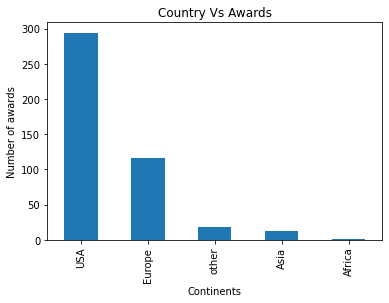

In [13]:
#Hypothesis 1 : Most Oscar winners are from USA.
#Plot bar chart to show frequency of award received by each continent
plt = pd.value_counts(df1['Continent']).plot(kind="bar" , title = 'Country Vs Awards', xlabel = 'Continents', ylabel = 'Number of awards')
plt

df2 = df1.groupby('Continent').agg(['size', 'sum','mean','std'])
df2

year_of_award                                 ldob        \
                        size     sum         mean        std size   sum   
race_ethnicity                                                            
Asian                      4    7962  1990.500000  24.718414    4    36   
Black                     15   29937  1995.800000  20.358221   15   137   
Hispanic                   8   15833  1979.125000  25.709573    8    72   
Middle Eastern             1    1985  1985.000000        NaN    1     9   
Multiracial                2    3985  1992.500000  13.435029    2    18   
White                    411  810464  1971.931873  23.734615  411  3788   

                                   award_age                               
                    mean       std      size    sum       mean        std  
race_ethnicity                                                             
Asian           9.000000  0.000000         4    185  46.250000  12.841988  
Black           9.133333  0.516398        15    615  41.000000  10.099505  
Hispanic        9.000000  0.000000         8    305  38.125000   4.517822  
Middle Eastern  9.000000       NaN         1     46  46.000000        NaN  
Multiracial     9.000000  0.000000         2     76  38.000000   2.828427  
White           9.216545  0.697954       411  18114  44.072993  12.676059

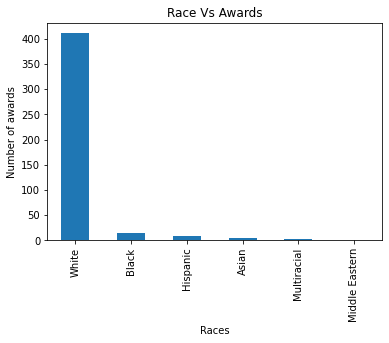

In [14]:
#Hypothesis 2 : Most Oscar winners are white.
#Plot bar chart to show frequency of award received by each race
plt = pd.value_counts(df1['race_ethnicity']).plot(kind="bar", title = 'Race Vs Awards', xlabel = 'Races', ylabel = 'Number of awards')
plt

df3 = df1.groupby('race_ethnicity').agg(['size', 'sum','mean','std'])
df3

<AxesSubplot:title={'center':'Award age Vs Awards'}, xlabel='Award', ylabel='Age of receipient'>

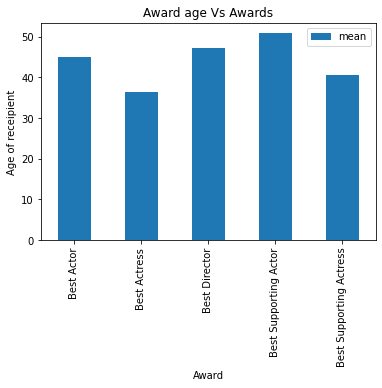

In [15]:
#Hypothesis 3 : Best Directors tend to be older than best Actors or Actresses.
#Plot bar chart to show mean of award received by age
df4 = df1.groupby('award').agg(['mean'])
df4 = df4['award_age']
df4.plot(kind='bar', title = 'Award age Vs Awards', xlabel = 'Award', ylabel = 'Age of receipient')

## Model Building

In [16]:
#Creating Buckets for award_age
bins = [0,35,45,55,100]

#creating new column Bucket with values Bucket 1-4 depending on age
df1['Bucket']=pd.cut(df1['award_age'],bins, labels=[1,2,3,4])
df1

<ipython-input-16-0bd60bde5a07>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Bucket']=pd.cut(df1['award_age'],bins, labels=[1,2,3,4])


,birthplace,date_of_birth,race_ethnicity,year_of_award,award,ldob,country,award_age,Continent,Bucket
0,"Chisinau, Moldova",30-Sep-1895,White,1927,Best Director,11,Moldova,32,Europe,1
1,"Glasgow, Scotland",02-Feb-1886,White,1930,Best Director,10,Scotland,44,Europe,2
2,"Chisinau, Moldova",30-Sep-1895,White,1931,Best Director,11,Moldova,36,Europe,2
3,"Chicago, Il",23-Feb-1899,White,1932,Best Director,11,USA,33,USA,1
4,"Salt Lake City, Ut",23-Apr-1894,White,1933,Best Director,11,USA,39,USA,2
...,...,...,...,...,...,...,...,...,...,...
436,"London, England",07-Mar-1971,White,2006,Best Supporting Actress,9,England,35,Europe,1
437,"Manchester, England",20-Oct-1956,White,2009,Best Director,9,England,53,Europe,3
438,"Chicago, Il",26-Jul-1922,White,1977,Best Supporting Actor,9,USA,55,USA,3
439,"Laurel, Ne",31-Aug-1928,White,1999,Best Supporting Actor,9,USA,71,USA,4


In [17]:
#finding unique values of award
df1['award'].unique()

array(['Best Director', 'Best Actor', 'Best Supporting Actor',
       'Best Actress', 'Best Supporting Actress'], dtype=object)

In [18]:
#redefining our dataset taking into account race,country, age
df1 = df1[['race_ethnicity','Continent','award_age','award','Bucket']]
df1.loc[:,'sexual_orientation'] = df['sexual_orientation']
df1.loc[:,'person'] = df['person']
df1

D:\users\lib\site-packages\pandas\core\indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
D:\users\lib\site-packages\pandas\core\indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


,race_ethnicity,Continent,award_age,award,Bucket,sexual_orientation,person
0,White,Europe,32,Best Director,1,Straight,Lewis Milestone
1,White,Europe,44,Best Director,2,Straight,Frank Lloyd
2,White,Europe,36,Best Director,2,Straight,Lewis Milestone
3,White,USA,33,Best Director,1,Straight,Norman Taurog
4,White,USA,39,Best Director,2,Straight,Frank Borzage
...,...,...,...,...,...,...,...
436,White,Europe,35,Best Supporting Actress,1,Straight,Rachel Weisz
437,White,Europe,53,Best Director,3,Straight,Danny Boyle
438,White,USA,55,Best Supporting Actor,3,Straight,Jason Robards
439,White,USA,71,Best Supporting Actor,4,Straight,James Coburn


In [19]:
#Spliting the data into a training set and a test set
X = df1[['race_ethnicity','Continent','award_age']]
X = pd.get_dummies(df1[['race_ethnicity','Continent']])
X.loc[:,'award_age'] = df1['award_age']

Y = df1['award']
#Y = pd.get_dummies(Y, columns=['award'])

trainX, testX, trainY, testY = train_test_split(X, Y, test_size = 0.25, random_state = 2)

print('Training X Shape:', trainX.shape)
print('Training Y Shape:', trainY.shape)
print('Testing X Shape:', testX.shape)
print('Testing Y Shape:', testY.shape)

Training X Shape: (330, 12)
Training Y Shape: (330,)
Testing X Shape: (111, 12)
Testing Y Shape: (111,)


In [20]:
#using random forest clasification model
clf = RandomForestClassifier()
clf.fit(trainX, trainY)

RandomForestClassifier()

In [21]:
#predicting and printing values
predicted = clf.predict(testX)

print("Mean hits: {}".format(np.mean(predicted == testY)))
print("Accuracy score: {}".format(metrics.accuracy_score(testY, predicted)))

scores = cross_val_score(RandomForestClassifier(), X, Y, scoring='accuracy', cv=10)
print("Cross validation mean scores: {}".format(scores.mean()))


Mean hits: 0.36036036036036034
Accuracy score: 0.36036036036036034
Cross validation mean scores: 0.3516666666666667


In [22]:
#Plot Confusion matrix
def classify_for_threshold(clf, testX, testY, t ):
    prob_df1 = pd.DataFrame(clf.predict_proba(testX)[:,1])
    prob_df1['predict'] = np.where(prob_df1[0] >= t, 1, 0)
    prob_df1['actual'] = testY
    return pd.crosstab(testY, predicted, rownames = ['Actual'], colnames = ['Predicted'])
for t in [0.2, 0.3, 0.5, 0.1, 0.01, 0.08]:
    crosstab = classify_for_threshold(clf, testX, testY, t)
    print("Threshold {}:\n{}\n".format(t, crosstab))
    

Threshold 0.2:
Predicted                Best Actor  Best Actress  Best Director  \
Actual                                                             
Best Actor                        6             4              6   
Best Actress                      3            13              1   
Best Director                     4             4             10   
Best Supporting Actor             5             2              3   
Best Supporting Actress           3             7              2   

Predicted                Best Supporting Actor  Best Supporting Actress  
Actual                                                                   
Best Actor                                   0                        3  
Best Actress                                 4                        2  
Best Director                                3                        2  
Best Supporting Actor                        8                        4  
Best Supporting Actress                      9                  

# Part 2

# Improving Our Model

In [23]:
#Defining dataset to be used
df1.head()

,race_ethnicity,Continent,award_age,award,Bucket,sexual_orientation,person
0,White,Europe,32,Best Director,1,Straight,Lewis Milestone
1,White,Europe,44,Best Director,2,Straight,Frank Lloyd
2,White,Europe,36,Best Director,2,Straight,Lewis Milestone
3,White,USA,33,Best Director,1,Straight,Norman Taurog
4,White,USA,39,Best Director,2,Straight,Frank Borzage


In [24]:
#finding shape of dataframe
df1.shape

(441, 7)

In [25]:
#checking for missing values
df1.isnull().values.any()

False

In [26]:
#filling in missing data 
df1.fillna(method="ffill")

,race_ethnicity,Continent,award_age,award,Bucket,sexual_orientation,person
0,White,Europe,32,Best Director,1,Straight,Lewis Milestone
1,White,Europe,44,Best Director,2,Straight,Frank Lloyd
2,White,Europe,36,Best Director,2,Straight,Lewis Milestone
3,White,USA,33,Best Director,1,Straight,Norman Taurog
4,White,USA,39,Best Director,2,Straight,Frank Borzage
...,...,...,...,...,...,...,...
436,White,Europe,35,Best Supporting Actress,1,Straight,Rachel Weisz
437,White,Europe,53,Best Director,3,Straight,Danny Boyle
438,White,USA,55,Best Supporting Actor,3,Straight,Jason Robards
439,White,USA,71,Best Supporting Actor,4,Straight,James Coburn


In [27]:
#finding distinct value in column
df1['sexual_orientation'].unique()

array(['Straight', 'Bisexual', 'Gay', 'Na', 'Matter of Dispute',
       'Lesbian'], dtype=object)

In [28]:
#cleaning sexual orientation column
#function to clean and group sexual orientation
def sex_orient(c):
    con = c.split(',')
    for i in con:
        heterosexual = ['Straight']
        bisexual = ['Bisexual']
        homosexual = ['Gay','Lesbian']
        other = [ 'Na','Matter of Dispute']
        #print(con)
        if i in heterosexual:
            return "Heterosexual"
        elif i in bisexual:
            return "Bisexual"
        elif i in homosexual:
            return "Homosexual"
        elif i in other:
            return "Prefer not to say"
        else:
            return "Not Applicable"

#creating new column sexual_orientation        
df1.loc[:,'Sexual_orientation'] = df1['sexual_orientation'].apply(lambda x: sex_orient(x))
df1.head(10)


D:\users\lib\site-packages\pandas\core\indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
D:\users\lib\site-packages\pandas\core\indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


,race_ethnicity,Continent,award_age,award,Bucket,sexual_orientation,person,Sexual_orientation
0,White,Europe,32,Best Director,1,Straight,Lewis Milestone,Heterosexual
1,White,Europe,44,Best Director,2,Straight,Frank Lloyd,Heterosexual
2,White,Europe,36,Best Director,2,Straight,Lewis Milestone,Heterosexual
3,White,USA,33,Best Director,1,Straight,Norman Taurog,Heterosexual
4,White,USA,39,Best Director,2,Straight,Frank Borzage,Heterosexual
5,White,Europe,48,Best Director,3,Straight,Frank Lloyd,Heterosexual
6,White,Europe,38,Best Director,2,Straight,Frank Capra,Heterosexual
7,White,USA,42,Best Director,2,Bisexual,John Ford,Bisexual
8,White,Europe,40,Best Director,2,Straight,Frank Capra,Heterosexual
9,White,USA,40,Best Director,2,Straight,Leo McCarey,Heterosexual


In [29]:
#Adding value best directress to award
print(df1[df1['person']=='Carol Reed'].index.values)
print(df1[df1['person']=='Kathryn Bigelow'].index.values)

#Changing values of specific index to best directress
df1.loc[[42],'award'] = 'Best Directress'
df1.loc[[83],'award'] = 'Best Directress'
df1.head(10)

[42]
[83]


D:\users\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


,race_ethnicity,Continent,award_age,award,Bucket,sexual_orientation,person,Sexual_orientation
0,White,Europe,32,Best Director,1,Straight,Lewis Milestone,Heterosexual
1,White,Europe,44,Best Director,2,Straight,Frank Lloyd,Heterosexual
2,White,Europe,36,Best Director,2,Straight,Lewis Milestone,Heterosexual
3,White,USA,33,Best Director,1,Straight,Norman Taurog,Heterosexual
4,White,USA,39,Best Director,2,Straight,Frank Borzage,Heterosexual
5,White,Europe,48,Best Director,3,Straight,Frank Lloyd,Heterosexual
6,White,Europe,38,Best Director,2,Straight,Frank Capra,Heterosexual
7,White,USA,42,Best Director,2,Bisexual,John Ford,Bisexual
8,White,Europe,40,Best Director,2,Straight,Frank Capra,Heterosexual
9,White,USA,40,Best Director,2,Straight,Leo McCarey,Heterosexual


In [30]:
#creating a gender column
#function to clean and group sexual orientation
def gen(g):
    f = g.split(',')
    for i in f:
        male = ['Best Actor','Best Director', 'Best Supporting Actor']
        female = ['Best Actress','Best Supporting Actress','Best Directress']
        #print(con)
        if i in male:
            return "Male"
        elif i in female:
            return "Female"
    
#creating new column gender        
df1.loc[:,'Gender'] = df1['award'].apply(lambda x: gen(x))
df1.head(10)

D:\users\lib\site-packages\pandas\core\indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
D:\users\lib\site-packages\pandas\core\indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


,race_ethnicity,Continent,award_age,award,Bucket,sexual_orientation,person,Sexual_orientation,Gender
0,White,Europe,32,Best Director,1,Straight,Lewis Milestone,Heterosexual,Male
1,White,Europe,44,Best Director,2,Straight,Frank Lloyd,Heterosexual,Male
2,White,Europe,36,Best Director,2,Straight,Lewis Milestone,Heterosexual,Male
3,White,USA,33,Best Director,1,Straight,Norman Taurog,Heterosexual,Male
4,White,USA,39,Best Director,2,Straight,Frank Borzage,Heterosexual,Male
5,White,Europe,48,Best Director,3,Straight,Frank Lloyd,Heterosexual,Male
6,White,Europe,38,Best Director,2,Straight,Frank Capra,Heterosexual,Male
7,White,USA,42,Best Director,2,Bisexual,John Ford,Bisexual,Male
8,White,Europe,40,Best Director,2,Straight,Frank Capra,Heterosexual,Male
9,White,USA,40,Best Director,2,Straight,Leo McCarey,Heterosexual,Male


In [31]:
#view datatypes
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 441 entries, 0 to 440
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   race_ethnicity      441 non-null    object  
 1   Continent           441 non-null    object  
 2   award_age           441 non-null    int64   
 3   award               441 non-null    object  
 4   Bucket              441 non-null    category
 5   sexual_orientation  441 non-null    object  
 6   person              441 non-null    object  
 7   Sexual_orientation  441 non-null    object  
 8   Gender              441 non-null    object  
dtypes: category(1), int64(1), object(7)
memory usage: 28.3+ KB


In [32]:
df2 = df1[['race_ethnicity','Continent','award_age','Bucket','Sexual_orientation','Gender']]
df2 = pd.get_dummies(df1[['race_ethnicity','Sexual_orientation','Gender','Continent','Bucket']])
df2.loc[:,'award_age'] = df1['award_age']
df2

,race_ethnicity_Asian,race_ethnicity_Black,race_ethnicity_Hispanic,race_ethnicity_Middle Eastern,race_ethnicity_Multiracial,race_ethnicity_White,Sexual_orientation_Bisexual,Sexual_orientation_Heterosexual,Sexual_orientation_Homosexual,Sexual_orientation_Prefer not to say,...,Continent_Africa,Continent_Asia,Continent_Europe,Continent_USA,Continent_other,Bucket_1,Bucket_2,Bucket_3,Bucket_4,award_age
0,0,0,0,0,0,1,0,1,0,0,...,0,0,1,0,0,1,0,0,0,32
1,0,0,0,0,0,1,0,1,0,0,...,0,0,1,0,0,0,1,0,0,44
2,0,0,0,0,0,1,0,1,0,0,...,0,0,1,0,0,0,1,0,0,36
3,0,0,0,0,0,1,0,1,0,0,...,0,0,0,1,0,1,0,0,0,33
4,0,0,0,0,0,1,0,1,0,0,...,0,0,0,1,0,0,1,0,0,39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
436,0,0,0,0,0,1,0,1,0,0,...,0,0,1,0,0,1,0,0,0,35
437,0,0,0,0,0,1,0,1,0,0,...,0,0,1,0,0,0,0,1,0,53
438,0,0,0,0,0,1,0,1,0,0,...,0,0,0,1,0,0,0,1,0,55
439,0,0,0,0,0,1,0,1,0,0,...,0,0,0,1,0,0,0,0,1,71


In [33]:
df2_norm = df2.select_dtypes(include=[np.number])
df2_norm = (df2_norm - df2_norm.min()) / (df2_norm.max() - df2_norm.min())
df2_norm.describe()

,race_ethnicity_Asian,race_ethnicity_Black,race_ethnicity_Hispanic,race_ethnicity_Middle Eastern,race_ethnicity_Multiracial,race_ethnicity_White,Sexual_orientation_Bisexual,Sexual_orientation_Heterosexual,Sexual_orientation_Homosexual,Sexual_orientation_Prefer not to say,...,Continent_Africa,Continent_Asia,Continent_Europe,Continent_USA,Continent_other,Bucket_1,Bucket_2,Bucket_3,Bucket_4,award_age
count,441.000000,441.000000,441.000000,441.000000,441.000000,441.000000,441.000000,441.000000,441.000000,441.000000,...,441.000000,441.000000,441.000000,441.000000,441.000000,441.000000,441.000000,441.00000,441.000000,441.000000
mean,0.009070,0.034014,0.018141,0.002268,0.004535,0.931973,0.047619,0.900227,0.020408,0.031746,...,0.002268,0.027211,0.263039,0.666667,0.040816,0.263039,0.351474,0.21542,0.170068,0.456349
std,0.094913,0.181470,0.133611,0.047619,0.067267,0.252079,0.213201,0.300038,0.141552,0.175522,...,0.047619,0.162882,0.440783,0.471940,0.198089,0.440783,0.477973,0.41158,0.376119,0.173237
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.333333
50%,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.430556
75%,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.00000,0.000000,0.541667
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [34]:
#Datase with dummy variables concatenated with award column
df3 = df2
df3.loc[:,'award']= df1['award']
df3

,race_ethnicity_Asian,race_ethnicity_Black,race_ethnicity_Hispanic,race_ethnicity_Middle Eastern,race_ethnicity_Multiracial,race_ethnicity_White,Sexual_orientation_Bisexual,Sexual_orientation_Heterosexual,Sexual_orientation_Homosexual,Sexual_orientation_Prefer not to say,...,Continent_Asia,Continent_Europe,Continent_USA,Continent_other,Bucket_1,Bucket_2,Bucket_3,Bucket_4,award_age,award
0,0,0,0,0,0,1,0,1,0,0,...,0,1,0,0,1,0,0,0,32,Best Director
1,0,0,0,0,0,1,0,1,0,0,...,0,1,0,0,0,1,0,0,44,Best Director
2,0,0,0,0,0,1,0,1,0,0,...,0,1,0,0,0,1,0,0,36,Best Director
3,0,0,0,0,0,1,0,1,0,0,...,0,0,1,0,1,0,0,0,33,Best Director
4,0,0,0,0,0,1,0,1,0,0,...,0,0,1,0,0,1,0,0,39,Best Director
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
436,0,0,0,0,0,1,0,1,0,0,...,0,1,0,0,1,0,0,0,35,Best Supporting Actress
437,0,0,0,0,0,1,0,1,0,0,...,0,1,0,0,0,0,1,0,53,Best Director
438,0,0,0,0,0,1,0,1,0,0,...,0,0,1,0,0,0,1,0,55,Best Supporting Actor
439,0,0,0,0,0,1,0,1,0,0,...,0,0,1,0,0,0,0,1,71,Best Supporting Actor


In [35]:
#normalizing df3
df3_norm = df3.select_dtypes(include=[np.number])
df3_norm = (df3_norm - df3_norm.min()) / (df3_norm.max() - df3_norm.min())
df3_norm.describe()

,race_ethnicity_Asian,race_ethnicity_Black,race_ethnicity_Hispanic,race_ethnicity_Middle Eastern,race_ethnicity_Multiracial,race_ethnicity_White,Sexual_orientation_Bisexual,Sexual_orientation_Heterosexual,Sexual_orientation_Homosexual,Sexual_orientation_Prefer not to say,...,Continent_Africa,Continent_Asia,Continent_Europe,Continent_USA,Continent_other,Bucket_1,Bucket_2,Bucket_3,Bucket_4,award_age
count,441.000000,441.000000,441.000000,441.000000,441.000000,441.000000,441.000000,441.000000,441.000000,441.000000,...,441.000000,441.000000,441.000000,441.000000,441.000000,441.000000,441.000000,441.00000,441.000000,441.000000
mean,0.009070,0.034014,0.018141,0.002268,0.004535,0.931973,0.047619,0.900227,0.020408,0.031746,...,0.002268,0.027211,0.263039,0.666667,0.040816,0.263039,0.351474,0.21542,0.170068,0.456349
std,0.094913,0.181470,0.133611,0.047619,0.067267,0.252079,0.213201,0.300038,0.141552,0.175522,...,0.047619,0.162882,0.440783,0.471940,0.198089,0.440783,0.477973,0.41158,0.376119,0.173237
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.333333
50%,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.430556
75%,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.00000,0.000000,0.541667
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [36]:
#Spliting the data into a training set and a test set
X = df1[['race_ethnicity','Continent','award_age','Bucket','Sexual_orientation','Gender']]
X = pd.get_dummies(df1[['race_ethnicity','Sexual_orientation','Gender','Continent','Bucket']])
X.loc[:,'award_age'] = df1['award_age']

## Nomalise the data
X_norm = X.select_dtypes(include=[np.number])
X_norm = (X_norm - X_norm.min()) / (X_norm.max() - X_norm.min())
X_norm.describe()

,race_ethnicity_Asian,race_ethnicity_Black,race_ethnicity_Hispanic,race_ethnicity_Middle Eastern,race_ethnicity_Multiracial,race_ethnicity_White,Sexual_orientation_Bisexual,Sexual_orientation_Heterosexual,Sexual_orientation_Homosexual,Sexual_orientation_Prefer not to say,...,Continent_Africa,Continent_Asia,Continent_Europe,Continent_USA,Continent_other,Bucket_1,Bucket_2,Bucket_3,Bucket_4,award_age
count,441.000000,441.000000,441.000000,441.000000,441.000000,441.000000,441.000000,441.000000,441.000000,441.000000,...,441.000000,441.000000,441.000000,441.000000,441.000000,441.000000,441.000000,441.00000,441.000000,441.000000
mean,0.009070,0.034014,0.018141,0.002268,0.004535,0.931973,0.047619,0.900227,0.020408,0.031746,...,0.002268,0.027211,0.263039,0.666667,0.040816,0.263039,0.351474,0.21542,0.170068,0.456349
std,0.094913,0.181470,0.133611,0.047619,0.067267,0.252079,0.213201,0.300038,0.141552,0.175522,...,0.047619,0.162882,0.440783,0.471940,0.198089,0.440783,0.477973,0.41158,0.376119,0.173237
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.333333
50%,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.430556
75%,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.00000,0.000000,0.541667
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [37]:
#obtaining dummmy values of Y normalizing Y
Y = df1['award']
Y = pd.get_dummies(df1[['award']])
Y_norm = Y.select_dtypes(include=[np.number])
Y_norm = (Y_norm - Y_norm.min()) / (Y_norm.max() - Y_norm.min())
Y_norm.describe()

,award_Best Actor,award_Best Actress,award_Best Director,award_Best Directress,award_Best Supporting Actor,award_Best Supporting Actress
count,441.000000,441.00000,441.000000,441.000000,441.000000,441.000000
mean,0.199546,0.21542,0.201814,0.004535,0.185941,0.192744
std,0.400113,0.41158,0.401810,0.067267,0.389501,0.394902
min,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000


In [38]:
#Using a linear regression model
model = linear_model.LogisticRegression()
X = X_norm
Y = df1['award']

#choosing the 12 numeric columns that have the highest correlation to the award
selector = feature_selection.RFE(model, n_features_to_select = 12, step=2)
selector = selector.fit(X, Y)
selected_features = X.loc[:, selector.support_]
print("Selected features:\n{}".format(',\n'.join(list(selected_features))))


D:\users\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\users\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\u

Selected features:
race_ethnicity_Black,
race_ethnicity_Hispanic,
race_ethnicity_Multiracial,
race_ethnicity_White,
Sexual_orientation_Bisexual,
Sexual_orientation_Prefer not to say,
Gender_Female,
Gender_Male,
Continent_Asia,
Bucket_1,
Bucket_4,
award_age


In [39]:
#splitting into training and testing 
X = np.array(selected_features)
Y = np.array(df1['award'])

trainX, testX, trainY, testY = train_test_split(X, Y, test_size = 0.25, random_state = 2)
      
#Builds up a Random Forest classifier
crf = RandomForestClassifier(n_jobs=-1, n_estimators= 400, oob_score=True)
crf.fit(trainX,trainY)

print('Training X Shape:', trainX.shape)
print('Training Y Shape:', trainY.shape)
print('Testing X Shape:', testX.shape)
print('Testing Y Shape:', testY.shape)

Training X Shape: (330, 12)
Training Y Shape: (330,)
Testing X Shape: (111, 12)
Testing Y Shape: (111,)


In [40]:
#Print accuracy score for test and training data
print("Accuracy score for training data is: {:4.2f}".format(crf.score(trainX, trainY)))
print("Accuracy score for test data: {:4.2f}".format(crf.score(testX, testY)))
print("The Oob score is: {:4.2f}".format(crf.oob_score_))

Accuracy score for training data is: 0.72
Accuracy score for test data: 0.51
The Oob score is: 0.46


In [41]:
#Test data
prediction = crf.predict(testX)
pd.crosstab(testY, prediction, rownames = ['Actual'], colnames = ['Predicted'])

Predicted,Best Actor,Best Actress,Best Director,Best Directress,Best Supporting Actor,Best Supporting Actress
Actual,,,,,,
Best Actor,6,0,10,0,3,0
Best Actress,0,15,0,0,0,8
Best Director,6,0,14,0,3,0
Best Supporting Actor,6,0,4,0,12,0
Best Supporting Actress,0,12,0,2,0,10


In [42]:

crossvalidation = KFold(10, shuffle=True)
score1 = cross_val_score(clf, X, Y,scoring='accuracy',cv=crossvalidation,n_jobs=-1)
print("X valiation score for Logistic regression is: {:5.4f}".format(np.mean(score1)))
score2=cross_val_score(crf, X, Y,scoring='accuracy',cv=crossvalidation,n_jobs=-1)
print("X validation score for Random Forest: {:5.4f}".format(np.mean(score2)))

X valiation score for Logistic regression is: 0.4897
X validation score for Random Forest: 0.4831


In [43]:
# means of chemichal composition
df3.groupby('award').mean()

,race_ethnicity_Asian,race_ethnicity_Black,race_ethnicity_Hispanic,race_ethnicity_Middle Eastern,race_ethnicity_Multiracial,race_ethnicity_White,Sexual_orientation_Bisexual,Sexual_orientation_Heterosexual,Sexual_orientation_Homosexual,Sexual_orientation_Prefer not to say,...,Continent_Africa,Continent_Asia,Continent_Europe,Continent_USA,Continent_other,Bucket_1,Bucket_2,Bucket_3,Bucket_4,award_age
award,,,,,,,,,,,,,,,,,,,,,
Best Actor,0.000000,0.045455,0.011364,0.011364,0.011364,0.920455,0.056818,0.920455,0.011364,0.011364,...,0.000000,0.000000,0.295455,0.681818,0.022727,0.113636,0.465909,0.284091,0.136364,45.045455
Best Actress,0.000000,0.000000,0.000000,0.000000,0.010526,0.989474,0.063158,0.894737,0.021053,0.021053,...,0.010526,0.073684,0.242105,0.631579,0.042105,0.600000,0.252632,0.063158,0.084211,36.421053
Best Director,0.022472,0.000000,0.000000,0.000000,0.000000,0.977528,0.067416,0.887640,0.033708,0.011236,...,0.000000,0.033708,0.382022,0.561798,0.022472,0.033708,0.471910,0.348315,0.146067,46.966292
Best Directress,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.500000,0.500000,0.000000,0.000000,0.000000,0.000000,1.000000,60.500000
Best Supporting Actor,0.012195,0.048780,0.048780,0.000000,0.000000,0.890244,0.000000,0.890244,0.036585,0.073171,...,0.000000,0.012195,0.195122,0.707317,0.085366,0.121951,0.292683,0.243902,0.341463,50.890244
Best Supporting Actress,0.011765,0.082353,0.035294,0.000000,0.000000,0.870588,0.047059,0.905882,0.000000,0.047059,...,0.000000,0.011765,0.188235,0.764706,0.035294,0.423529,0.282353,0.152941,0.141176,40.505882


In [44]:
(df3[df3['award']=='Best Actress'].shape[0] + df3[df3['award']=='Best Actor'].shape[0])/df3['award'].shape[0]

0.41496598639455784

In [45]:
## call KMeans algo with 6 clusters
model = KMeans(n_clusters=6)
model.fit(df3_norm)
## J score
print('J-score = ', model.inertia_)
#print(' score = ', model.score(df_norm))
## include the labels into the data
print(model.labels_)

J-score =  403.00757256105044
[3 3 3 2 2 0 3 2 3 2 3 4 0 0 3 4 0 2 3 3 3 2 2 2 0 4 0 0 2 0 0 4 4 0 0 0 3
 4 0 4 3 0 4 3 0 2 0 0 2 3 2 2 2 0 2 2 4 2 0 0 2 0 0 2 2 0 4 0 2 2 3 2 0 3
 2 0 4 2 4 0 4 0 0 4 3 3 4 3 2 4 0 0 3 2 0 3 2 2 3 2 2 2 4 2 3 0 4 3 2 2 0
 0 2 2 2 3 3 0 2 0 3 0 2 4 2 3 2 0 4 2 2 0 0 4 2 4 2 2 2 2 4 3 0 0 2 4 2 0
 3 3 0 0 2 2 2 0 4 0 2 2 0 2 2 2 2 0 0 0 4 0 3 4 2 2 3 2 0 0 4 2 4 4 2 2 4
 4 0 3 2 2 2 2 2 2 2 0 0 3 2 4 4 3 0 0 2 4 4 4 0 2 4 2 4 0 4 2 4 2 4 0 0 2
 4 0 4 2 2 0 4 4 0 4 2 2 0 4 4 2 0 0 0 4 2 4 2 2 0 3 4 4 2 1 5 1 4 1 1 1 1
 1 1 1 1 1 1 3 1 1 5 1 1 1 1 1 5 0 1 1 0 3 1 5 3 1 1 1 5 1 1 1 4 1 4 3 1 1
 1 3 5 5 5 1 5 1 1 4 1 0 5 4 1 5 1 4 5 1 1 5 0 0 5 1 1 1 1 5 5 1 1 1 4 1 1
 0 1 4 1 5 5 0 0 5 4 5 1 3 4 5 1 1 5 1 4 1 1 1 1 5 1 1 0 5 1 1 1 4 0 0 1 5
 4 1 4 0 0 1 4 0 4 3 3 1 1 4 1 5 4 1 5 4 1 3 5 5 1 1 0 1 1 5 4 1 5 1 1 1 5
 1 1 0 1 5 0 5 1 1 0 1 2 2 5 1 0 5 5 2 1 0 1 1 1 1 4 5 5 3 1 0 0 4 2]


In [46]:
labels = model.labels_
md = pd.Series(labels)
df3_norm['clust'] = md
df3_norm.head(5)

,race_ethnicity_Asian,race_ethnicity_Black,race_ethnicity_Hispanic,race_ethnicity_Middle Eastern,race_ethnicity_Multiracial,race_ethnicity_White,Sexual_orientation_Bisexual,Sexual_orientation_Heterosexual,Sexual_orientation_Homosexual,Sexual_orientation_Prefer not to say,...,Continent_Asia,Continent_Europe,Continent_USA,Continent_other,Bucket_1,Bucket_2,Bucket_3,Bucket_4,award_age,clust
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.291667,3
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.458333,3
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.347222,3
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.305556,2
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.388889,2


In [47]:
## cluster centers 
centroids = model.cluster_centers_
print ('centroids', centroids)

centroids [[ 1.06382979e-02  3.19148936e-02 -6.93889390e-18  1.06382979e-02
  -1.73472348e-18  9.46808511e-01  3.19148936e-02  9.57446809e-01
  -1.38777878e-17  1.06382979e-02  1.91489362e-01  8.08510638e-01
  -8.67361738e-19  2.12765957e-02  2.55319149e-01  7.12765957e-01
   1.06382979e-02 -2.22044605e-16  4.44089210e-16  1.00000000e+00
  -1.94289029e-16  5.36495272e-01]
 [ 1.07526882e-02  2.15053763e-02  2.15053763e-02 -3.90312782e-18
  -7.80625564e-18  9.46236559e-01  5.37634409e-02  8.92473118e-01
   2.15053763e-02  3.22580645e-02  1.00000000e+00 -8.88178420e-16
   1.07526882e-02  7.52688172e-02  2.04301075e-01  6.77419355e-01
   3.22580645e-02  1.00000000e+00  7.77156117e-16 -3.88578059e-16
  -3.05311332e-16  2.56720430e-01]
 [ 1.07526882e-02  4.30107527e-02  5.37634409e-02 -3.46944695e-18
  -6.93889390e-18  8.92473118e-01  2.15053763e-02  9.24731183e-01
   3.22580645e-02  2.15053763e-02  6.66133815e-16  1.00000000e+00
  -3.46944695e-18  1.07526882e-02 -3.88578059e-16  9.03225806e

<AxesSubplot:title={'center':'Histogram of Clusters'}, ylabel='Frequency'>

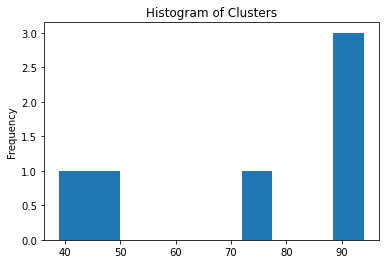

In [48]:
plt = pd.value_counts(df3_norm['clust']).plot(kind="hist", title = 'Histogram of Clusters', xlabel = 'Clusters', ylabel = 'Frequency')
plt

In [49]:
## means of the clusters
#print ('clustered data', df_norm)
df3_norm.groupby('clust').mean()

,race_ethnicity_Asian,race_ethnicity_Black,race_ethnicity_Hispanic,race_ethnicity_Middle Eastern,race_ethnicity_Multiracial,race_ethnicity_White,Sexual_orientation_Bisexual,Sexual_orientation_Heterosexual,Sexual_orientation_Homosexual,Sexual_orientation_Prefer not to say,...,Continent_Africa,Continent_Asia,Continent_Europe,Continent_USA,Continent_other,Bucket_1,Bucket_2,Bucket_3,Bucket_4,award_age
clust,,,,,,,,,,,,,,,,,,,,,
0,0.010638,0.031915,0.000000,0.010638,0.000000,0.946809,0.031915,0.957447,0.000000,0.010638,...,0.000000,0.021277,0.255319,0.712766,0.010638,0.000000,0.000000,1.000000,0.0,0.536495
1,0.010753,0.021505,0.021505,0.000000,0.000000,0.946237,0.053763,0.892473,0.021505,0.032258,...,0.010753,0.075269,0.204301,0.677419,0.032258,1.000000,0.000000,0.000000,0.0,0.256720
2,0.010753,0.043011,0.053763,0.000000,0.000000,0.892473,0.021505,0.924731,0.032258,0.021505,...,0.000000,0.010753,0.000000,0.903226,0.086022,0.182796,0.817204,0.000000,0.0,0.388142
3,0.000000,0.000000,0.000000,0.000000,0.021277,0.978723,0.085106,0.851064,0.042553,0.021277,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.127660,0.872340,0.000000,0.0,0.403664
4,0.013333,0.013333,0.000000,0.000000,0.000000,0.973333,0.066667,0.853333,0.026667,0.053333,...,0.000000,0.013333,0.346667,0.600000,0.040000,0.000000,0.000000,0.000000,1.0,0.747593
5,0.000000,0.128205,0.025641,0.000000,0.025641,0.820513,0.051282,0.871795,0.000000,0.076923,...,0.000000,0.025641,0.000000,0.897436,0.076923,0.000000,0.974359,0.025641,0.0,0.405271


<module 'matplotlib.pyplot' from 'D:\\users\\lib\\site-packages\\matplotlib\\pyplot.py'>

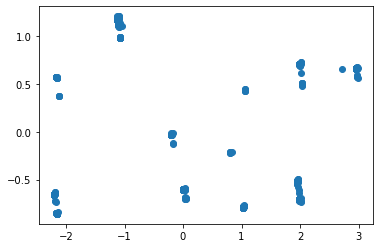

In [50]:
######## 2D plot of the clusters
import matplotlib.pyplot as plt
pca_data = PCA(n_components=2).fit(df3_norm)
pca_2d = pca_data.transform(df3_norm)
plt.scatter(pca_2d[:,0], pca_2d[:,1])
plt


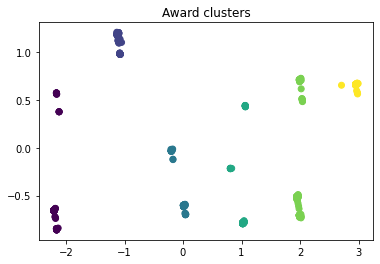

In [51]:
######## 2D plot of the clusters
plt.scatter(pca_2d[:,0], pca_2d[:,1], c=labels)
plt.title('Award clusters')
plt.show()


Plotting elbow method...
2 1103.2607447485336
4 605.6171868276166
6 403.00757256105044
8 336.4127340265754
10 287.4246388974553
12 241.9014091500952
14 207.37775779364594


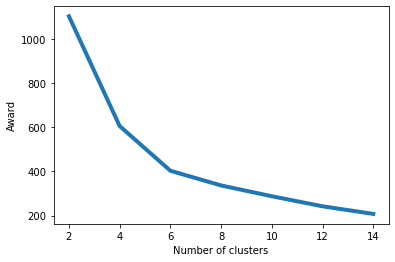

DONE


In [52]:
def graph(data):
    print("\nPlotting elbow method...")
    sse = {}
    for k in range(2, 15, 2):
        kmeans = KMeans(n_clusters=k, max_iter=1000).fit(data)
        print(k, kmeans.inertia_)
        sse[k] = kmeans.inertia_  
    plt.figure()
    plt.plot(list(sse.keys()), list(sse.values()), linewidth=4)
    plt.xlabel("Number of clusters")
    plt.ylabel("Award")
    plt.show()
    print("DONE")
graph(df3_norm)